In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
units=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\charger-stations-data-cleaned\HABITATIONAL UNITS\Unidades habitacionales.csv")
mun=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\charger-stations-data-cleaned\PARKINGS\municipios totales.csv")
man=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\charger-stations-data-cleaned\PARKINGS\manzanas totales.csv")

units.sort_values("CVEGEO", inplace=True)
mun.sort_values("CVE_MUN",inplace=True)
man.sort_values("CVEGEO",inplace=True)

units.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,AMBITO,TIPOMZA,NOMBRE,ALCALDIA,OID
12774,0900200010025006,9,2,1,0025,6,Urbana,Edificio-Manzana,Unidad Habitacional,Azcapotzalco,12775
13069,0900200010025007,9,2,1,0025,7,Urbana,Edificio-Manzana,Unidad Habitacional,Azcapotzalco,13070
13481,0900200010025009,9,2,1,0025,9,Urbana,Edificio-Manzana,Unidad Habitacional,Azcapotzalco,13482
13480,0900200010025010,9,2,1,0025,10,Urbana,Edificio-Manzana,Unidad Habitacional,Azcapotzalco,13481
13479,0900200010025011,9,2,1,0025,11,Urbana,Edificio-Manzana,Unidad Habitacional,Azcapotzalco,13480


In [77]:
man.drop(columns="NUM_EST", inplace=True)
man.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,AMBITO,TIPOMZA,OID
2117,0900200010010001,9,2,1,0010,1,Urbana,Típica,2118
2116,0900200010010002,9,2,1,0010,2,Urbana,Típica,2117
2114,0900200010010003,9,2,1,0010,3,Urbana,Típica,2115
2113,0900200010010004,9,2,1,0010,4,Urbana,Típica,2114
2112,0900200010010005,9,2,1,0010,5,Urbana,Típica,2113


In [70]:
mun.head()


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,OID
11,9002,9,2,Azcapotzalco,12
0,9003,9,3,Coyoacán,1
14,9004,9,4,Cuajimalpa de Morelos,15
13,9005,9,5,Gustavo A. Madero,14
8,9006,9,6,Iztacalco,9


In [80]:
man["NUM_UH"]=man.CVEGEO
dict_units=dict(zip(units.CVEGEO,[1]*len(units)))
man.NUM_UH=man.NUM_UH.map(dict_units)
man.NUM_UH.fillna(0, inplace=True)
man.sample(10)


,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,AMBITO,TIPOMZA,OID,NUM_UH
40284,0901500010589008,9,15,1,0589,8,Urbana,Típica,40285,0.0
10490,0900500012606012,9,5,1,2606,12,Urbana,Típica,10491,0.0
42558,090160001075A008,9,16,1,075A,8,Urbana,Típica,42559,0.0
9141,0900400010373017,9,4,1,0373,17,Urbana,Típica,9142,0.0
56517,0900700014791016,9,7,1,4791,16,Urbana,Edificio-Manzana,56518,1.0
53600,0900700010784017,9,7,1,0784,17,Urbana,Típica,53601,0.0
205,0900200010631048,9,2,1,0631,48,Urbana,Típica,206,0.0
60218,0900700010784010,9,7,1,0784,10,Urbana,Típica,60219,0.0
47259,0901700010494011,9,17,1,0494,11,Urbana,Típica,47260,0.0
62015,0900700015713051,9,7,1,5713,51,Urbana,Contenida,62016,1.0


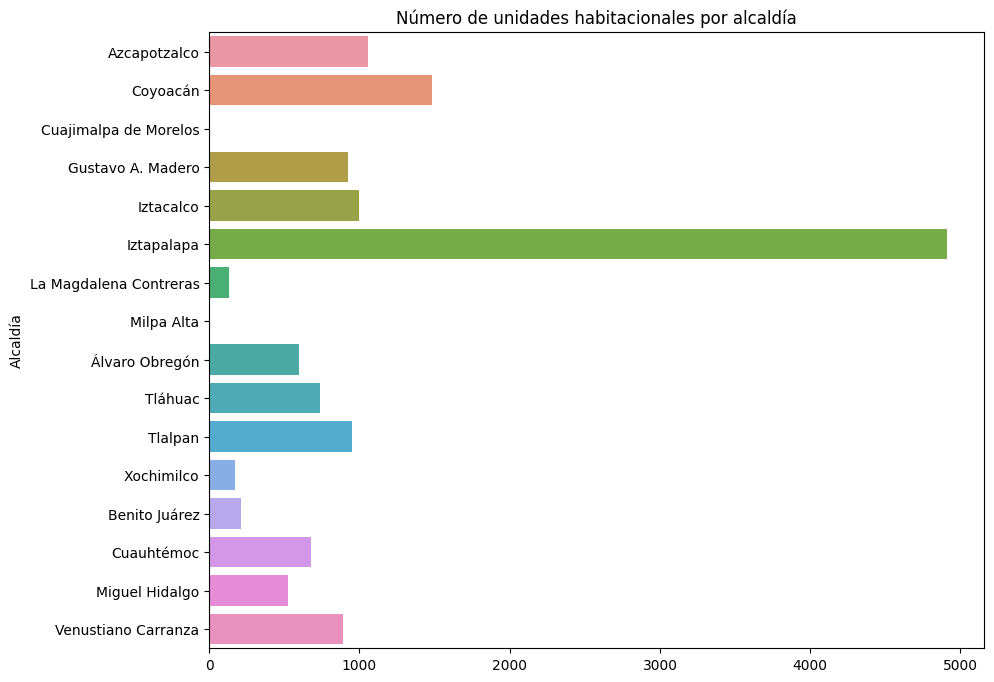

In [90]:
mun_units=man.groupby("CVE_MUN").aggregate({
    
    "NUM_UH" : np.sum
})
mun_dict=dict(mun_units.NUM_UH)
mun["NUM_UH"]=mun.CVE_MUN
mun.NUM_UH=mun.NUM_UH.map(mun_dict)
plt.figure(figsize=(10,8))
fig=sns.barplot(data=mun, y="NOMGEO", x="NUM_UH")
fig.set_title("Número de unidades habitacionales por alcaldía")
fig.set_xlabel("")
fig.set_ylabel("Alcaldía")
plt.show()

In [92]:
mun.to_csv("UH_MUN.csv", index=False)
man.to_csv("UH_MAN.csv",index=False)